# Instant Gratification

Kaggle Competition Link >>> https://www.kaggle.com/c/instant-gratification/overview

> This notebook is a kaggle competition that introduces the process of Psuedo Labeling
to improve predictions on data. Pseudo labeling is the process of adding confident predicted
test data to your training data. 

Data Description:
    
This is an anonymized, binary classification dataset found on a USB stick that washed ashore in a bottle. There was no data dictionary with the dataset, but this poem was handwritten on an accompanying scrap of paper:

>Silly column names abound, 
but the test set is a mystery. 
>Careful how you pick and slice, 
>or be left behind by history.

In [1]:
#Load Data 
 
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_auc_score

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [2]:
train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,...,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,...,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.288558,0.515875,0.920590,-1.223277,...,0.516422,0.130521,-0.459210,2.028205,-0.093968,-0.218274,-0.163136,-0.870289,0.064038,1
3,e350f17a357f12a1941f0837afb7eb8d,0.183774,0.919134,-0.946958,0.918492,0.862278,1.155287,0.911106,0.562598,-1.349685,...,-1.168967,1.385089,-0.353028,3.316150,-0.524087,-0.794327,3.936365,0.682989,-2.521211,0
4,a8f910ea6075b6376af079055965ff68,-0.203933,-0.177252,0.368074,-0.701320,-1.104391,0.735760,0.894273,-1.375826,-5.144946,...,-0.279168,1.544356,2.959727,1.641201,-0.130818,-0.264292,-0.748668,0.964218,0.087079,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262144 entries, 0 to 262143
Columns: 258 entries, id to target
dtypes: float64(255), int64(2), object(1)
memory usage: 516.0+ MB


## Step 1 & 2 : Build First QDA Model and Predict Test

In [4]:
cols = [c for c in train.columns if c not in ['id', 'target']]
        
cols.remove('wheezy-copper-turtle-magic')
oof = np.zeros(len(train))
preds = np.zeros(len(test))

# Build 512 Seperate Models
num = test['wheezy-copper-turtle-magic'] < 512
test2 = test[num]

num2 = train['wheezy-copper-turtle-magic'] < 512
train2 = train[num2]
   
    
    
idx1 = train2.index; idx2 = test2.index
train2.reset_index(drop=True, inplace=True)
    
# FEATURE SELECTION (USE APPROX 40 OF 255 FEATURES)
sel = VarianceThreshold(threshold=1.2).fit(train2[cols])
train3 = sel.transform(train2[cols])
test3 = sel.transform(test2[cols])
    
    
# STRATIFIED K-FOLD
skf = StratifiedKFold(n_splits=11, random_state=42, shuffle=True)
for train_index, test_index in skf.split(train3, train2['target']):
        
    #MODEL AND PREDICT WITH QDA
    clf = QuadraticDiscriminantAnalysis(reg_param=0.5)
    clf.fit(train3[train_index,:], train2.loc[train_index]['target'])
    oof[idx1[test_index]] = clf.predict_proba(train3[test_index,:])[:,1]
    preds[idx2] += clf.predict_proba(test3)[:,1] / skf.n_splits
       
    #if i%64==0: print(i)

# PRINT CV AUC
auc = roc_auc_score(train['target'],oof)
print('QDA scores CV =',round(auc,5))



QDA scores CV = 0.63184


In [5]:
train.shape, train3.shape

((262144, 258), (262144, 255))

In [6]:
# INITIALIZE VARIABLES
test['target'] = preds
oof = np.zeros(len(train))
preds = np.zeros(len(test))

# Build 512 Seperate Models
num3 = test['wheezy-copper-turtle-magic'] < 512
test2 = test[num3]

num4 = train['wheezy-copper-turtle-magic'] < 512
train2 = train[num4]

 
train2p = train2.copy(); idx1 = train2.index 

    
# ADD PSEUDO LABELED DATA
test2p = test2[ (test2['target']<=0.01) | (test2['target']>=0.99) ].copy()
test2p.loc[ test2p['target']>=0.5, 'target' ] = 1
test2p.loc[ test2p['target']<0.5, 'target' ] = 0 
train2p = pd.concat([train2p,test2p],axis=0)
train2p.reset_index(drop=True,inplace=True)
    
#FEATURE SELECTION (USE APPROX 40 OF 255 FEATURES)
sel = VarianceThreshold(threshold=1.15).fit(train2p[cols])     
train3p = sel.transform(train2p[cols])
train3 = sel.transform(train2[cols])
test3 = sel.transform(test2[cols])
        
# STRATIFIED K FOLD
skf = StratifiedKFold(n_splits=11, random_state=42, shuffle=True)
for train_index, test_index in skf.split(train3p, train2p['target']):
    test_index3 = test_index[ test_index<len(train3) ] # ignore pseudo in oof
        
    # MODEL AND PREDICT WITH QDA
    clf = QuadraticDiscriminantAnalysis(reg_param=0.5)
    clf.fit(train3p[train_index,:],train2p.loc[train_index]['target'])
    oof[idx1[test_index3]] = clf.predict_proba(train3[test_index3,:])[:,1]
    preds[test2.index] += clf.predict_proba(test3)[:,1] / skf.n_splits
       
    #if k%64==0: print(k)
        
# PRINT CV AUC
auc = roc_auc_score(train['target'],oof)
print('Pseudo Labeled QDA scores CV =',round(auc,5))

Pseudo Labeled QDA scores CV = 0.63403


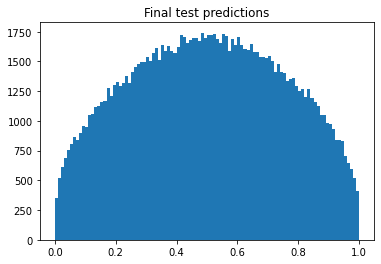

In [8]:
sub = pd.read_csv("sample_submission.csv")
sub["target"] = preds
sub.to_csv("submission.csv", index=False)

plt.hist(preds, bins=100)
plt.title("Final test predictions")
plt.show()